In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pyp

data0=pd.read_csv("finaldata.csv")

In [3]:
data0.head()

,Domain,ipinurl,splchar,dots,urllength,urldepth,tinyurl,prefixSuffix,redir,domainAge,domainEnd,dns,label
0,olx.ro,0,0,0,0,5,0,0,0,1,1,1,0
1,hubpages.com,0,0,0,0,4,0,0,0,0,1,0,0
2,skyrock.com,0,0,0,0,2,0,0,0,0,1,0,0
3,vnexpress.net,0,0,0,0,3,0,0,0,0,0,0,0
4,pikabu.ru,0,0,0,0,2,0,0,0,0,1,0,0


In [4]:
data0.shape

(10000, 13)

In [5]:
data0.isnull().sum()

Domain          0
ipinurl         0
splchar         0
dots            0
urllength       0
urldepth        0
tinyurl         0
prefixSuffix    0
redir           0
domainAge       0
domainEnd       0
dns             0
label           0
dtype: int64

In [6]:
data0.describe()

,ipinurl,splchar,dots,urllength,urldepth,tinyurl,prefixSuffix,redir,domainAge,domainEnd,dns,label
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.0,0.026100,0.062100,0.364000,2.500400,0.089200,0.122700,0.013700,0.517300,0.701800,0.454200,0.500000
std,0.0,0.159441,0.241349,0.481173,2.046221,0.285046,0.328109,0.116248,0.499726,0.457491,0.497923,0.500025
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.500000
75%,0.0,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data0 = data0.sample(frac=1).reset_index(drop=True)

In [8]:
data0.head()

,Domain,ipinurl,splchar,dots,urllength,urldepth,tinyurl,prefixSuffix,redir,domainAge,domainEnd,dns,label
0,persianblog.ir,0,0,0,0,4,0,0,0,1,1,1,0
1,twitter.com,0,0,0,0,1,0,0,0,0,1,0,0
2,1drv.ms,0,0,0,1,2,0,0,0,1,1,1,1
3,kurortnoye.com.ua,0,1,1,0,3,0,0,0,0,0,0,1
4,citagestionenlineabn.com,0,0,0,1,0,0,0,0,0,0,0,1


Visualizing Distribution of data across each feature

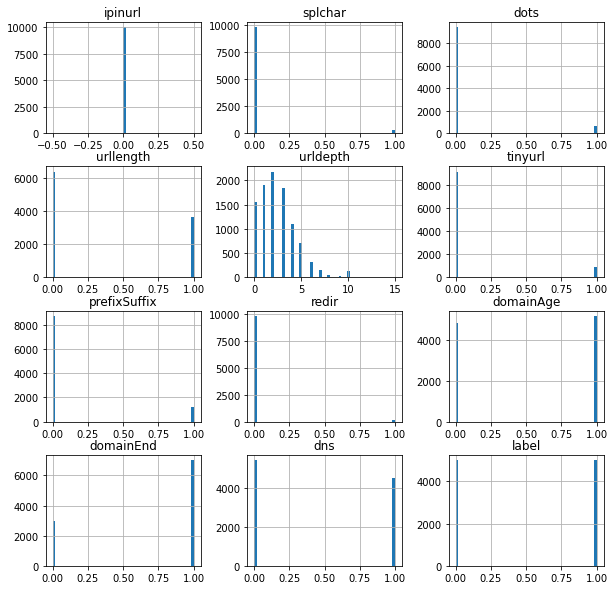

In [9]:
data0.hist(bins=50, figsize = (10,10))
pyp.show()

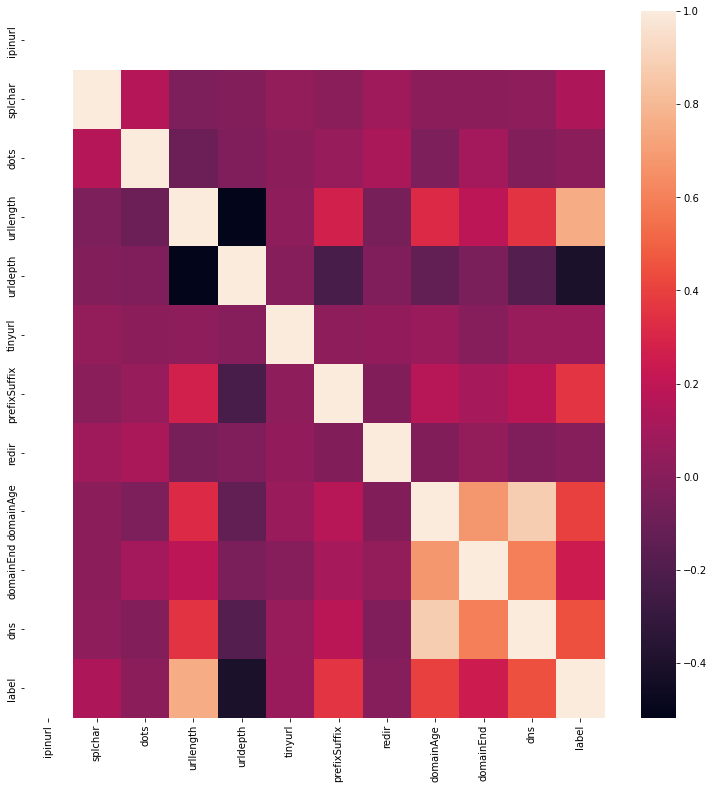

In [10]:
#Correlation heatmap for the final dataset.


pyp.figure(figsize = (13,13))
sb.heatmap(data0.corr())
pyp.show()

In [11]:
data0.tail()
data = data0.drop(['Domain'], axis = 1).copy()

In [12]:
data.head()

,ipinurl,splchar,dots,urllength,urldepth,tinyurl,prefixSuffix,redir,domainAge,domainEnd,dns,label
0,0,0,0,0,4,0,0,0,1,1,1,0
1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,1,2,0,0,0,1,1,1,1
3,0,1,1,0,3,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,1


In [13]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,ipinurl,splchar,dots,urllength,urldepth,tinyurl,prefixSuffix,redir,domainAge,domainEnd,dns,label
0,0,0,0,0,1,0,0,0,1,1,1,0
1,0,0,0,0,2,0,1,0,1,1,1,1
2,0,0,0,1,3,0,0,0,1,1,1,1
3,0,0,0,0,9,0,0,0,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,0,1


In [14]:
data.shape

(10000, 12)

In [15]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Feature Selection

In [16]:
X = data[['ipinurl','splchar','dots','urllength','urldepth','tinyurl','prefixSuffix','dns','redir','domainAge','domainEnd']]
y = data['label']

X.shape, y.shape

((10000, 11), (10000,))

### Splitting Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

Splitting is done, now we should train and test using different classifier algorithms!!! 

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


1. Decision Tree
2. Random forest
3. XGboost
4. MLP classifer

In [20]:
#from sklearn.tree import DecisionTreeClassifier
#dtc = DecisionTreeClassifier(max_depth=5)
#dtc.fit(X_train,y_train)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train.values,y_train.values)
y_pred=dtc.predict(X_test.values)

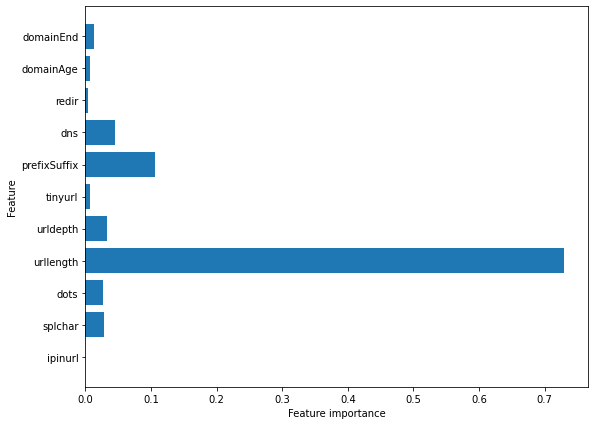

In [22]:
#checking the feature improtance in the model
pyp.figure(figsize=(9,7))
n_features = X_train.shape[1]
pyp.barh(range(n_features), dtc.feature_importances_, align='center')
pyp.yticks(np.arange(n_features), X_train.columns)
pyp.xlabel("Feature importance")
pyp.ylabel("Feature")
pyp.show()

In [23]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.923


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3)
rfc.fit(X_train.values,y_train.values)



RandomForestClassifier(max_depth=3)

In [25]:
y_pred=rfc.predict(X_test.values)

In [26]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.895


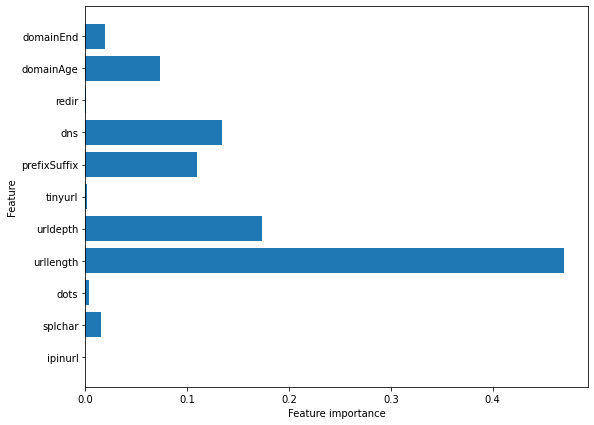

In [27]:
#checking the feature improtance in the model
pyp.figure(figsize=(9,7))
n_features = X_train.shape[1]
pyp.barh(range(n_features), rfc.feature_importances_, align='center')
pyp.yticks(np.arange(n_features), X_train.columns)
pyp.xlabel("Feature importance")
pyp.ylabel("Feature")
pyp.show()

>MultiLayer Perceptron is an ANN algorithm
>Supervised learning model
>Uses Back propogation for training 

In [28]:

from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [29]:
y_pred_mlp=mlp.predict(X_test)

In [30]:
from sklearn import metrics
# Model Amlpccuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mlp))

Accuracy: 0.9165


In [31]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(n_estimators=100)
#fit the model
xgb.fit(X_train, y_train)

[16:36:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/neeraj/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred_xgb=xgb.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.9205


In [35]:
xgb.feature_importances_

array([0.        , 0.01198522, 0.00899718, 0.900584  , 0.00196686,
       0.00177451, 0.05086172, 0.01706185, 0.00120205, 0.00374122,
       0.0018255 ], dtype=float32)

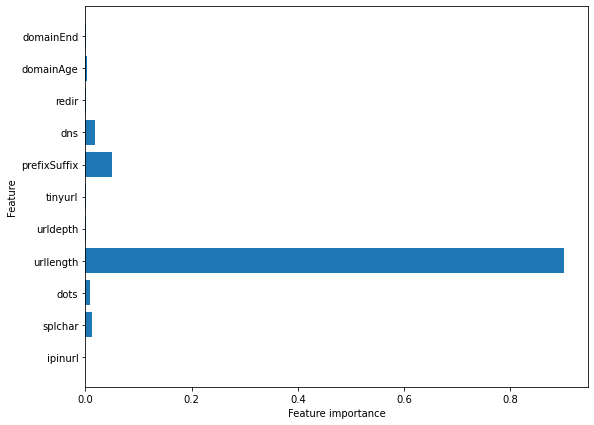

In [36]:
#checking the feature improtance in the model
pyp.figure(figsize=(9,7))
n_features = X_train.shape[1]
pyp.barh(range(n_features), xgb.feature_importances_, align='center')
pyp.yticks(np.arange(n_features), X_train.columns)
pyp.xlabel("Feature importance")
pyp.ylabel("Feature")
pyp.show()

<BarContainer object of 11 artists>

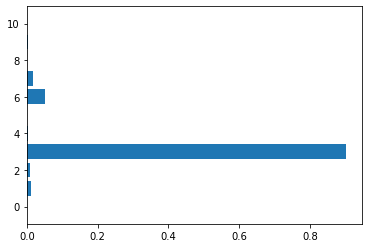

In [37]:
pyp.barh(range(n_features),xgb.feature_importances_,align='center')

In [38]:
data.head(1)

,ipinurl,splchar,dots,urllength,urldepth,tinyurl,prefixSuffix,redir,domainAge,domainEnd,dns,label
0,0,0,0,0,1,0,0,0,1,1,1,0


In [39]:
dtc.predict([[1,1,1,0,3,1,1,1,1,1,0]])[0]

1

In [40]:
rfc.predict([[0,0,0,0,4,0,0,0,0,0,0]])[0]

0

#### Saving into pickle


In [41]:
import pickle
pickle.dump(mlp, open("mlpc.pickle.dat","wb"))

In [42]:
final_model=pickle.load(open("mlpc.pickle.dat","rb"))
final_model

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [43]:
import pickle
pickle.dump(dtc, open("dtc.pickle.dat","wb"))

In [44]:
import pickle
pickle.dump(xgb, open("xgb.pickle.dat","wb"))

In [45]:
import pickle
pickle.dump(rfc, open("rfc.pickle.dat","wb"))